#### [PREV](4.OOP_Logistic_Regression.ipynb) | [HOME](../README.md) | [NEXT](6.OOP_Neural_Network_Adv.ipynb)


#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Step 2: Import The Data

In [2]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Split The Data into Training And Testing Sets

In [3]:
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

X_insects = pd.get_dummies(insects[['continent', 'latitude', 'sex']], dummy_na=True, dtype='int')

y_insects = insects['wingsize']

X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.3, random_state=42)

Text(0, 0.5, 'Wing Span')

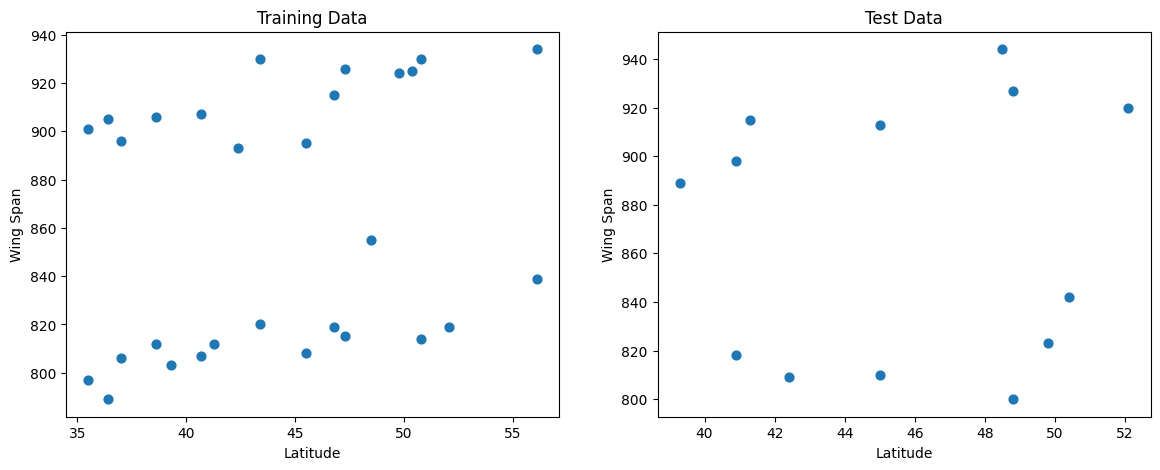

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 4: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [5]:
model = keras.Sequential([
    layers.Input(shape=(3,)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron (for regression)
])

In [6]:
model.compile(optimizer='adam', loss='MeanAbsoluteError')

#### Step 5: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [12]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 91.5647 - val_loss: 81.5585
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.1564 - val_loss: 81.7649
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102.3113 - val_loss: 81.8130
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.8481 - val_loss: 81.7678
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.6585 - val_loss: 81.6823
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.6762 - val_loss: 81.4675
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.3892 - val_loss: 81.6841
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2094 - val_loss: 81.6779
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.5405 - val_loss: 81.7470
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 100.2698 - val_loss: 81.7781
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7816 - val_loss: 81.7913
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━

#### Step 6: Evaluate The Model

In [8]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 81.6788
Test Loss: 81.6788


### Step 7: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [13]:
# Use the trained model to make predictions on new data
new_data = np.array([[1, 38, 0]])
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[750.5988]]


#### Step 8: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


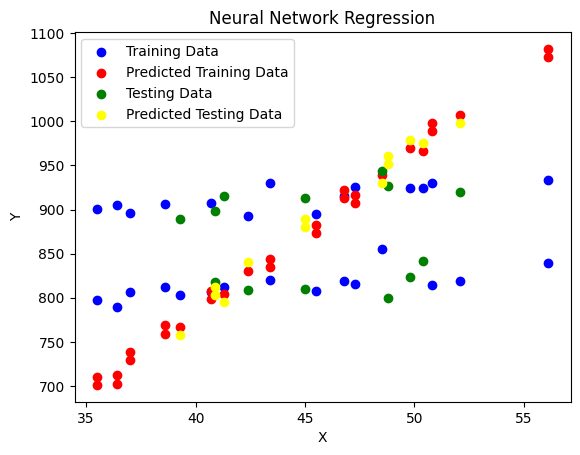

In [10]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_train[['latitude']], model.predict(X_train), label='Predicted Training Data', color='red')
plt.scatter(X_test[['latitude']], y_test, label='Testing Data', color='green')
plt.scatter(X_test[['latitude']], model.predict(X_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [11]:
predictions = model.predict(X_train).flatten()
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': y_train - predictions
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
    Target  Predicted result        Loss
9      924        969.890381  -45.890381
15     895        873.753174   21.246826
33     803        766.389771   36.610229
16     926        907.585266   18.414734
36     808        882.922485  -74.922485
35     820        843.451721  -23.451721
0      901        701.113403  199.886597
24     807        808.019714   -1.019714
5      893        830.802979   62.197021
11     905        702.713257  202.286743
40     819       1006.973328 -187.973328
1      896        729.306763  166.693237
31     814        997.855225 -183.855225
21     797        710.282654   86.717346
2      906        759.379639  146.620361
32     789        711.882568   77.117432
41     839       1082.155640 -243.155640
3      907        798.850464  108.149536
37     815        916.754517 -101.754517
23     812        768.548950   43.451050
34     812        803.980957    8.019043
10     930        988.685974  -58.685974
22     806        7